In [63]:
import sys
print(sys.version) # 3.12
import numpy as np # !pip3 install numpy
import pandas as pd # !pip3 install pandas
import matplotlib.pyplot as plt # !pip3 install matplotlib
import seaborn as sns # !ip install seaborn
import yfinance as yf # !pip3 install yfinance

3.11.6 (main, Oct  2 2023, 13:45:54) [Clang 15.0.0 (clang-1500.0.40.1)]


In [87]:
def retrieve_hist_assets(assets: list, window_range="2y") -> list:
    """Retrieve asset history values.

    Ecrire une fonction qui prend en entrée une liste de 5 actifs et qui renvoie les prix journaliers sur
    une fenêtre de 2 à 3 ans (le choix est donné à l’utilisateur) à partir de Yahoo Finance.

    N.B.:
        - package link: https://pypi.org/project/yfinance/
    :param assets: list of assets (max 5)
    :return: asset historical list
    """
    if len(assets) > 5:
        raise ValueError("On ne peut pas avoir plus de 5 assets!")
    if not window_range in ["2y", "3y"]:
        raise ValueError("Tu peux seulement demander 2y -> historique 2 ans ou 3y -> ...")
    df = pd.DataFrame()
    for asset in assets:
        msft = yf.Ticker(asset)
        hist = msft.history(period=window_range)
        hist_df = pd.DataFrame(hist)
        hist_df["actif"] = asset
        hist_df = hist_df.reset_index()
        hist_df["jour"] = hist_df.Date.dt.strftime('%Y-%m-%d')
        hist_df["mois"] = hist_df.Date.dt.strftime('%Y-%m')
        hist_df["annee"] = hist_df.Date.dt.strftime('%Y')
        if df.empty:
            df = hist_df.copy()
        else:
            df = pd.concat([df, hist_df])
    return df.reset_index()

df = retrieve_hist_assets(assets=["AAPL", "MSFT", "AMZN"], window_range="3y")
df.head(10)

,index,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,actif,jour,mois,annee
0,0,2021-01-04 00:00:00-05:00,131.202843,131.291278,124.560157,127.164169,143301900,0.0,0.0,AAPL,2021-01-04,2021-01,2021
1,1,2021-01-05 00:00:00-05:00,126.653185,129.453731,126.201162,128.736389,97664900,0.0,0.0,AAPL,2021-01-05,2021-01,2021
2,2,2021-01-06 00:00:00-05:00,125.503497,128.775709,124.186748,124.402931,155088000,0.0,0.0,AAPL,2021-01-06,2021-01,2021
3,3,2021-01-07 00:00:00-05:00,126.132394,129.345649,125.641071,128.647964,109578200,0.0,0.0,AAPL,2021-01-07,2021-01,2021
4,4,2021-01-08 00:00:00-05:00,130.131742,130.328283,127.969924,129.758347,105158200,0.0,0.0,AAPL,2021-01-08,2021-01,2021
5,5,2021-01-11 00:00:00-05:00,126.947985,127.910974,126.269957,126.741623,100384500,0.0,0.0,AAPL,2021-01-11,2021-01,2021
6,6,2021-01-12 00:00:00-05:00,126.269954,127.439305,124.658416,126.564751,91951100,0.0,0.0,AAPL,2021-01-12,2021-01,2021
7,7,2021-01-13 00:00:00-05:00,126.525430,129.168748,126.260126,128.618469,88636800,0.0,0.0,AAPL,2021-01-13,2021-01,2021
8,8,2021-01-14 00:00:00-05:00,128.530043,128.726570,126.525438,126.672844,90221800,0.0,0.0,AAPL,2021-01-14,2021-01,2021
9,9,2021-01-15 00:00:00-05:00,126.545094,127.960106,124.795986,124.933556,111598500,0.0,0.0,AAPL,2021-01-15,2021-01,2021


{100: '2021-05', 200: '2021-10', 300: '2022-03'}


ValueError: 'locs' must be 1D with shape (N,), but your input has shape ()

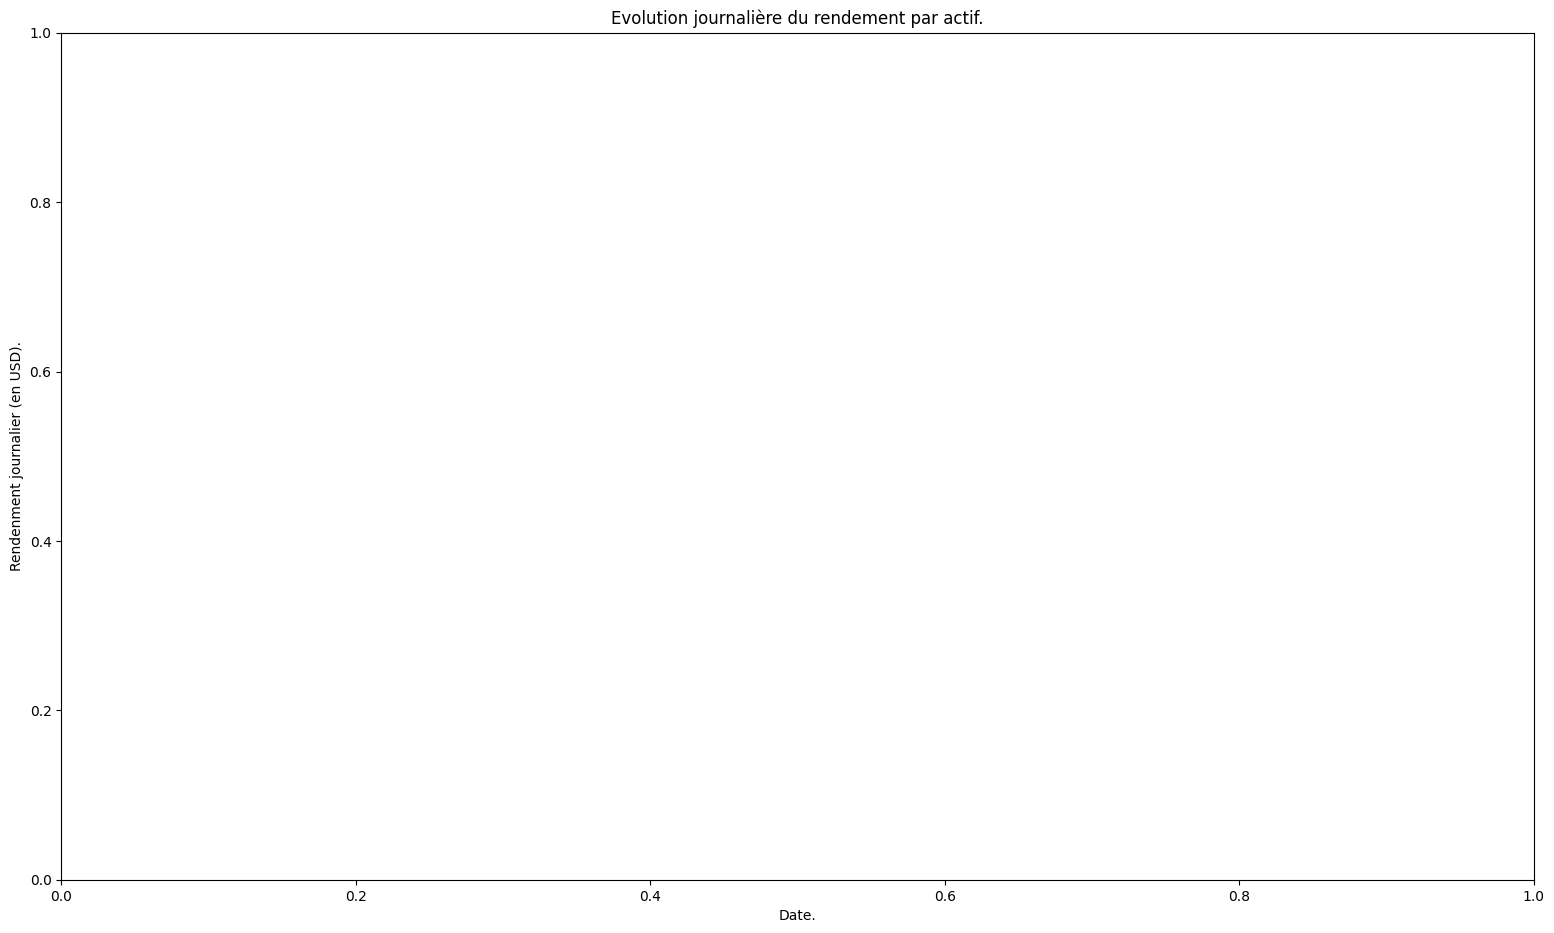

In [106]:
def get_rendement(df: pd.DataFrame) -> pd.DataFrame:
    """
    Écrire une fonction qui calcule le rendement quotidien de chaque actif. Intégrez dans cette fonction
    une variable pour calculer le rendement espéré annualisé de chaque actif. Représentez dans le
    même graphique les rendements quotidiens des 5 actifs avec des légendes claires.
    
    N.B.:
        - I used np.log -> est-ce que c'est le bon log
        - d'ailleurs shift(1) ou shift(-1)
    """
    new_df = df.copy()
    new_df["Rendement_Qtot"] = np.log(
        new_df.Close/new_df.Close.shift(1)
    )
    new_df = new_df[~new_df.index.isin(list(range(100)))]
    tqt = new_df.groupby("mois").agg({"Rendement_Qtot": "mean"})
    fig = plt.figure(figsize=(19, 11))
    plt.title("Evolution journalière du rendement par actif.")
    plt.ylabel("Rendenment journalier (en USD).")
    plt.xlabel("Date.")
    ticks_range = {
            index: new_df[new_df.index == index].mois.values[0]
        for index in new_df.index.unique()
        if index in [100, 200, 300]
    }
    # plt.xticks(ticks_range.keys(), ticks_range.values(), rotation='vertical')
    # plt.ylim((df['3. low'].min()-1, df['2. high'].max()+1))
    sns.lineplot(x=new_df["index"], y=new_df["Rendement_Qtot"], hue=new_df["actif"], markers=True, dashes=False)
    plt.show()
    print(new_df.Rendement_Qtot.max())
    return new_df

df_2 = get_rendement(df=df)
df_2.head()

In [29]:
def get_volatility_and_export_to_csv(df: pd.DataFrame, filename="loulou.csv") -> None:
    """Compute volatility and export to .csv"""
    print(f"Creation du fichier: {filename}")
    df.to_csv(filename, index=False, sep=";")

get_volatility_and_export_to_csv(df=df)